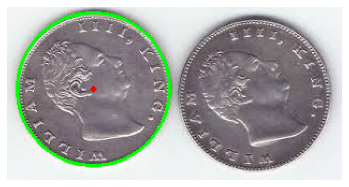

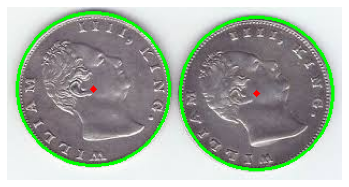

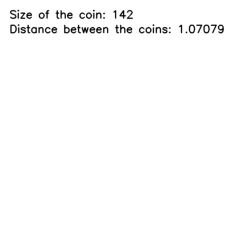

In [2]:
import cv2 
import numpy as np
from math import sqrt 
import matplotlib.pyplot as plt
  
# Read image. 
img = cv2.imread('circle2.jpg', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 50, minRadius = 70, maxRadius = 100) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
    i=1
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
        if i == 1:
            a1=a
            b1=b
            r1=r
            i=i+1
        """
        else:
            print("Size of the coin: ", 2*r)
            print("Distance: ", sqrt((a-a1)*(a-a1)+(b-b1)*(b-b1))/(2*r))
        #print(a,b,r)"""
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        #cv2.imshow("Detected Circle", img) 
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        cv2.waitKey(0) 
        if i==3 :
          break
buf1 = "Size of the coin: %d" % (2*r)
buf2 = "Distance between the coins: %f" % (sqrt((a-a1)*(a-a1)+(b-b1)*(b-b1))/(2*r))

img_1 = np.zeros([900,900,1],dtype=np.uint8)
img_1.fill(255)
position=(10,50)
cv2.putText(img_1,buf1,position,cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,255,0),3)
position=(10,110)
cv2.putText(img_1,buf2,position,cv2.FONT_HERSHEY_SIMPLEX,1.5,(0, 0, 255),3)

plt.axis("off")
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0) 
cv2.destroyAllWindows()